In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ZOEE.modules.configuration import importer, add_sellersparameters, parameterinterpolatorstepwise
from ZOEE.modules.variables import variable_importer, Vars, Base
from ZOEE.modules.optimization import ZOEE_optimization
#from ZOEE import update_plotstyle, moving_average
from ZOEE.modules.rk4 import rk4alg


In [26]:
Pmin=np.array([1*4.2e6,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100*4.2e6,240,2.5,1.3,1.3,1.3])
parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])


Parameters=[]
for i in range(6):
    Parameters.append({'name':parameter_labels[i],
                       'level':parameter_levels[i],
                       'range': np.linspace(Pmin[i],Pmax[i],2)})

# Parameter experiments - HadCM3 comparison

In [27]:
config_HadCM3=importer('Experiments/HadCM3/Config_HadCM3.ini')
parallel_config = {'number_of_parameters': 1, 'number_of_cycles': 1,'number_of_parallels': 2}
variable_importer(config_HadCM3,initialZMT=True,parallel=True,parallel_config=parallel_config)
config_HadCM3,Sellers=add_sellersparameters(config_HadCM3, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)
elevation=-0.0065*np.array(Sellers[1][1])

Loading Configuration from: Experiments/HadCM3/Config_HadCM3.ini
Loading Parameters from: ZOEE/config/SellersParameterization.ini


## C_ao

With parameter range $1\cdot 4.2e6$ to $100\cdot4.2e6$ with 50 steps

In [28]:
ZOEE=ZOEE_optimization(1,Parameters[0]['name'],Parameters[0]['level'],True,elevation)
config_HadCM3_Cao=ZOEE._overwrite_parameters(config_HadCM3,Parameters[0]['range'])
#config_addparameters=add_parameters(config_addsellers,parameter_values,parameter_labels)

variable_importer(config_HadCM3_Cao,initialZMT=True,parallel=True,parallel_config=parallel_config,control=True)
data_HadCM3_Cao_CTRL=rk4alg(config_HadCM3_Cao)

variable_importer(config_HadCM3_Cao,initialZMT=False,parallel=True,parallel_config=parallel_config,control=False)
Vars.T=data_HadCM3_Cao_CTRL[1][-1]
data_HadCM3_Cao=rk4alg(config_HadCM3_Cao)

Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


Transit State reached after 100000 steps within 192.7086889743805 seconds



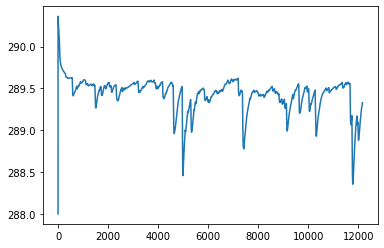

In [42]:
plt.plot(data_HadCM3_Cao[2][:,1])